In [186]:
import pandas as pd

# Llegim el dataset
file_path = 'dataset.xlsx'  # Assegura't que el fitxer estigui a la mateixa carpeta que el notebook o especifica el camí complet

df = pd.read_excel(file_path, header=1)
print("Dataset carregat correctament!")
print(f"Dimensions del dataset: {df.shape}")  # Mostra el nombre de files i columnes

# Fem un cop d'ull a les primeres files
df.head()


Dataset carregat correctament!
Dimensions del dataset: (222, 77)


,Pedigree,Sex,FamilialvsSporadic,COD NUMBER,Age at diagnosis,Binary diagnosis,Final diagnosis,TOBACCO,Detail,Comorbidities,...,Type of family history,1st degree relative,2nd degree relative,More than 1 relative,Genetic mutation studied in patient,Mutation Type,Severity of telomere shortening,Severity of telomere shortening - Transform 4,Progressive disease,ProgressiveDisease
0,1,Male,Familial,13820545,70.0,No IPF,3,2,Tobacco-associated,0,...,CPFE,1,0,0,1.0,NaN,3.0,6.0,1.0,1.0
1,2,Male,Familial,12974225,66.0,No IPF,8,2,NaN,1,...,Unspecified PF,1,0,1,1.0,NaN,1.0,4.0,1.0,1.0
2,3,Male,Familial,13551148,59.0,No IPF,3,2,Tobacco-associated,0,...,Unspecified PF,1,0,0,1.0,NaN,3.0,6.0,1.0,1.0
3,4,Female,Familial,13597482,66.0,IPF,1,0,Organizing,1,...,NaN,1,0,0,0.0,NaN,4.0,3.0,1.0,1.0
4,5,Male,Familial,10572432,72.0,IPF,1,0,NaN,1,...,"IPF, Dendriform ossification, GPA, IPAF",1,0,1,1.0,TERT Exon 2b/HT/c.835G>A / p.Ala279Thr/ rs6174...,3.0,6.0,1.0,1.0


In [187]:
import numpy as np

df['Death'].fillna('No', inplace=True)
df.replace(-9, np.nan, inplace=True)
df.replace('n/a', np.nan, inplace=True)
df['Hematological abnormality before diagnosis'].replace('None', 'No', inplace=True)
df['Type of neoplasia'].replace('None', 'No', inplace=True)
df['Hematologic Disease'] = df['Hematologic Disease'].apply(lambda x: 'Yes' if x != 'No' else x)
df['Liver disease'] = df['Liver disease'].apply(lambda x: 'Yes' if x != 'No' else x)
df['Death'] = df.apply(lambda row: 'Yes' if row['Death'] == 'No' and row['Transplantation date'] != 'No transplantation' else row['Death'], axis=1)
df['Progression'] = df['FVC (%) at diagnosis'] - df['FVC (%) 1 year after diagnosis']
df['Progression'] = df['Progression'].apply(lambda x: 'Yes' if x > 5 else 'No')

In [188]:
df.replace('Yes', 1, inplace=True)
df.replace('No', 0, inplace=True)

In [189]:
df.drop(columns=['FamilialvsSporadic', 'COD NUMBER', 'Binary diagnosis', 'Detail', 'Comorbidities', 'Detail on NON UIP', 'Pathology Pattern Binary', 'Pathology pattern UIP, probable or CHP', 'Pathology pattern', 'Extras AP', 'Diagnosis after Biopsy', 'Multidsciplinary committee', 'Pirfenidone', 'Nintedanib', 'Antifibrotic Drug', 'Prednisone', 'Mycophenolate', 'Type of telomeric extrapulmonary affectation', 'Extra', 'Type of liver abnormality', 'FVC (L) at diagnosis', 'FVC (L) 1 year after diagnosis', 'Transplantation date', 'Necessity of transplantation', 'Cause of death', 'Identified Infection', 'Date of death', 'Type of family history', 'Mutation Type', 'ProgressiveDisease', 'Severity of telomere shortening - Transform 4'], inplace=True)

In [190]:
# Buscar observaciones con més de 5 valors nuls
df[df.isnull().sum(axis=1) > 5]

# Eliminar observaciones con més de 5 valors nuls
df.dropna(thresh=df.shape[1]-5, inplace=True)

In [191]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Age at diagnosis                               1
Biopsy                                         3
Treatment                                      2
Extrapulmonary affectation                     1
Type of neoplasia                              3
Hematological abnormality before diagnosis     9
Blood count abnormality at diagnosis           1
Thrombocytopenia                               1
Leukopenia                                     2
Liver abnormality before diagnosis            17
FVC (%) 1 year after diagnosis                 2
DLCO (%) 1 year after diagnosis                4
Genetic mutation studied in patient           18
Severity of telomere shortening               68
Progressive disease                            8
dtype: int64

In [192]:
# Divisió entre variables numèriques i categòriques
numerical_vars = df.select_dtypes(include=['number']).columns
categorical_vars = df.select_dtypes(include=['object', 'category']).columns

print(f"Variables numèriques: {len(numerical_vars)}")
print(f"Variables categòriques: {len(categorical_vars)}")

Variables numèriques: 43
Variables categòriques: 4


In [193]:
# Bucle per tractar valors nuls en totes les columnes
for column in df.columns:
    if df[column].isnull().sum() > 0:  # Comprova si hi ha valors nuls
        if df[column].dtype in ['object', 'category']:  # Per columnes categòriques
            most_frequent_class = df[column].mode()[0]
            df[column].fillna(most_frequent_class, inplace=True)
            print(f"Els valors nuls de '{column}' s'han imputat amb la moda: {most_frequent_class}")
        elif pd.api.types.is_numeric_dtype(df[column]):  # Per columnes numèriques
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
            print(f"Els valors nuls de '{column}' s'han imputat amb la mitjana: {mean_value:.2f}")


Els valors nuls de 'Age at diagnosis' s'han imputat amb la mitjana: 66.46
Els valors nuls de 'Biopsy' s'han imputat amb la mitjana: 0.48
Els valors nuls de 'Treatment' s'han imputat amb la moda: Nintedanib
Els valors nuls de 'Extrapulmonary affectation' s'han imputat amb la mitjana: 0.14
Els valors nuls de 'Type of neoplasia' s'han imputat amb la moda: 0
Els valors nuls de 'Hematological abnormality before diagnosis' s'han imputat amb la mitjana: 0.14
Els valors nuls de 'Blood count abnormality at diagnosis' s'han imputat amb la mitjana: 0.25
Els valors nuls de 'Thrombocytopenia' s'han imputat amb la mitjana: 0.07
Els valors nuls de 'Leukopenia' s'han imputat amb la mitjana: 0.02
Els valors nuls de 'Liver abnormality before diagnosis' s'han imputat amb la mitjana: 0.12
Els valors nuls de 'FVC (%) 1 year after diagnosis' s'han imputat amb la mitjana: 82.49
Els valors nuls de 'DLCO (%) 1 year after diagnosis' s'han imputat amb la mitjana: 57.10
Els valors nuls de 'Genetic mutation studie

In [194]:
df.head()

,Pedigree,Sex,Age at diagnosis,Final diagnosis,TOBACCO,Radiological Pattern,Biopsy,Treatment,Extrapulmonary affectation,Associated lung cancer,...,DLCO (%) 1 year after diagnosis,RadioWorsening2y,Death,1st degree relative,2nd degree relative,More than 1 relative,Genetic mutation studied in patient,Severity of telomere shortening,Progressive disease,Progression
0,1,Male,70.0,3,2,UIP,0.0,Pirfenidone,0.0,0.0,...,27.0,1.0,1,1,0,0,1.0,3.0,1.0,1
1,2,Male,66.0,8,2,Probable UIP,0.0,"Pirfenidone, Prednisone, MMF, Rituximab, Tacro...",0.0,0.0,...,53.0,0.0,0,1,0,1,1.0,1.0,1.0,1
2,3,Male,59.0,3,2,UIP,1.0,"Nintedanib, Pirfenidone",0.0,0.0,...,28.4,1.0,1,1,0,0,1.0,3.0,1.0,0
3,4,Female,66.0,1,0,Non UIP,1.0,"Nintedanib, pirfenidone, prednisone",1.0,1.0,...,43.6,0.0,1,1,0,0,0.0,4.0,1.0,1
4,5,Male,72.0,1,0,Probable UIP,0.0,Pirfenidone,1.0,0.0,...,58.6,0.0,0,1,0,1,1.0,3.0,1.0,0


In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Converteix variables categòriques a numèriques amb One-Hot Encoding
X = pd.get_dummies(df.drop(columns=['Death']), drop_first=True)

# Variable objectiu
y = df['Death']

# Assegurar que y és del tipus int
y = y.astype(int)

# Dividim les dades en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Avaluar el model
y_pred = model.predict(X_test)
print("Informe de classificació:")
print(classification_report(y_test, y_pred))

# Calcular la importància de les característiques
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importància de les característiques:")
print(feature_importances)

Informe de classificació:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.88      0.78      0.82         9

    accuracy                           0.93        44
   macro avg       0.91      0.87      0.89        44
weighted avg       0.93      0.93      0.93        44

Importància de les característiques:
                                              Feature  Importance
32                     FVC (%) 1 year after diagnosis    0.121770
40                                Progressive disease    0.106873
31                              DLCO (%) at diagnosis    0.105423
33                    DLCO (%) 1 year after diagnosis    0.101976
30                               FVC (%) at diagnosis    0.081087
..                                                ...         ...
80  Treatment_Prednisone, Leflunomide, Rituximab, ...    0.000000
94     Type of neoplasia_Bladder Cancer, Liver Cancer    0.000000
75              

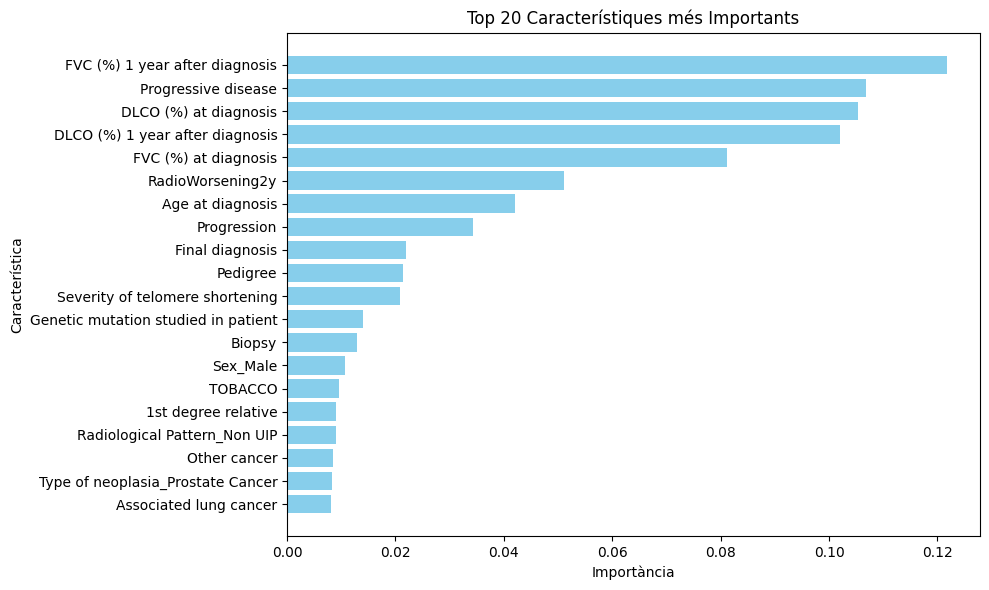

In [196]:
# Seleccionem només les 20 característiques més importants
top_features = feature_importances.head(20)

# Crear un gràfic millor ajustat
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color="skyblue")
plt.xlabel('Importància')
plt.ylabel('Característica')
plt.title('Top 20 Característiques més Importants')
plt.gca().invert_yaxis()  # Les característiques més importants a la part superior
plt.tight_layout()  # Ajusta l'espai per evitar que les etiquetes surtin tallades
plt.show()


In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Converteix variables categòriques a numèriques amb One-Hot Encoding
X = pd.get_dummies(df.drop(columns=['Progression']), drop_first=True)

# Variable objectiu
y = df['Progression']

# Assegurar que y és del tipus int
y = y.astype(int)

# Dividim les dades en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Avaluar el model
y_pred = model.predict(X_test)
print("Informe de classificació:")
print(classification_report(y_test, y_pred))

# Calcular la importància de les característiques
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importància de les característiques:")
print(feature_importances)

Informe de classificació:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        35
           1       0.80      0.44      0.57         9

    accuracy                           0.86        44
   macro avg       0.84      0.71      0.75        44
weighted avg       0.86      0.86      0.85        44

Importància de les característiques:
                                              Feature  Importance
32                     FVC (%) 1 year after diagnosis    0.106870
41                                Progressive disease    0.087727
30                               FVC (%) at diagnosis    0.076532
33                    DLCO (%) 1 year after diagnosis    0.072339
34                                   RadioWorsening2y    0.069950
..                                                ...         ...
16                                        Neutropenia    0.000000
61  Treatment_Nintedanib, pirfenidone, prednisone (2)    0.000000
50  Treatment_Ni

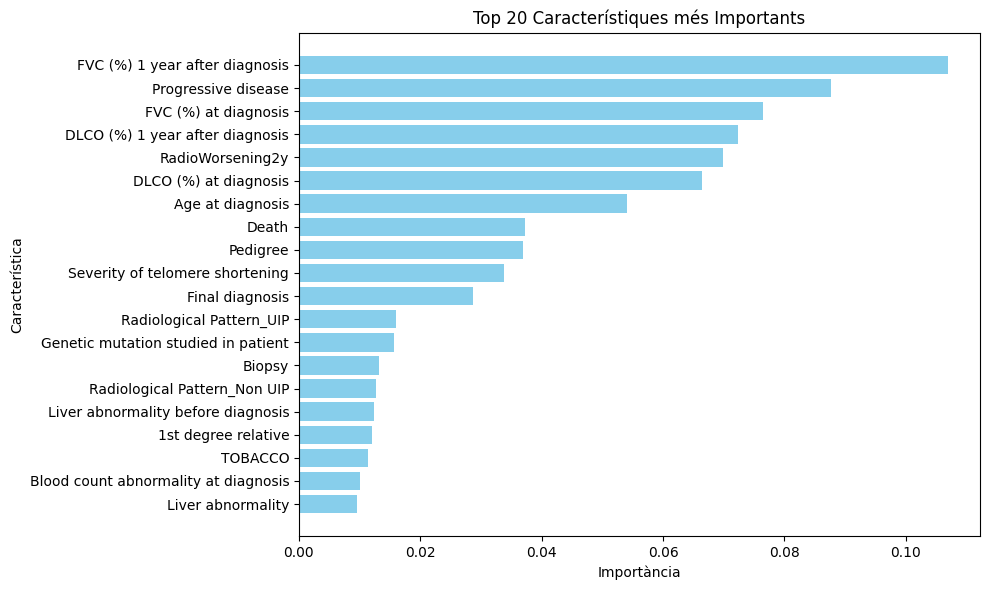

In [198]:
# Seleccionem només les 20 característiques més importants
top_features = feature_importances.head(20)

# Crear un gràfic millor ajustat
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color="skyblue")
plt.xlabel('Importància')
plt.ylabel('Característica')
plt.title('Top 20 Característiques més Importants')
plt.gca().invert_yaxis()  # Les característiques més importants a la part superior
plt.tight_layout()  # Ajusta l'espai per evitar que les etiquetes surtin tallades
plt.show()


In [201]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Converteix variables categòriques a numèriques amb One-Hot Encoding
X = pd.get_dummies(df.drop(columns=['Death']), drop_first=True)

# Variable objectiu
y = df['Death']

# Assegurar que y és del tipus int
y = y.astype(int)

# Dividim les dades en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalitza les dades
scaler = StandardScaler()

# Ajustem el scaler només al conjunt d'entrenament i transformem
X_train = scaler.fit_transform(X_train)

# Transformem el conjunt de test (sense ajustar)
X_test = scaler.transform(X_test)

# Entrenar un modelo
model = RandomForestClassifier(random_state=42, n_estimators=50)
model.fit(X_train, y_train)

from joblib import dump, load

# Guardar el model entrenat en un fitxer
dump(model, 'model_random_forest_death.pkl')
print("Model guardat com 'model_random_forest_death.pkl'")

# Evaluar el modelo
y_pred = model.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Model guardat com 'model_random_forest_death.pkl'
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.88      0.78      0.82         9

    accuracy                           0.93        44
   macro avg       0.91      0.87      0.89        44
weighted avg       0.93      0.93      0.93        44

Matriz de confusión:
[[34  1]
 [ 2  7]]


In [205]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Converteix variables categòriques a numèriques amb One-Hot Encoding
X = pd.get_dummies(df.drop(columns=['Progression']), drop_first=True)

# Variable objectiu
y = df['Progression']

# Assegurar que y és del tipus int
y = y.astype(int)

# Dividim les dades en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Codificar las etiquetas (one-hot encoding)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)


model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

model.save('model_neural_network_progression.h5')

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

# Generar predicciones
y_pred = model.predict(X_test)

# Convertir las predicciones (probabilidades) a etiquetas discretas
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test_labels, y_pred_labels))

# Identificar les classes presents en les etiquetes i les prediccions
classes_presentes = np.unique(np.concatenate([y_test_labels, y_pred_labels]))


Epoch 1/100


c:\Users\irene\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\irene\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6540 - loss: 5.4045 - val_accuracy: 0.2857 - val_loss: 3.2411
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5562 - loss: 4.3423 - val_accuracy: 0.8286 - val_loss: 0.5362
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6547 - loss: 2.6155 - val_accuracy: 0.7143 - val_loss: 1.6110
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6801 - loss: 2.5397 - val_accuracy: 0.8000 - val_loss: 0.5690
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6723 - loss: 2.0604 - val_accuracy: 0.7714 - val_loss: 0.7163
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5691 - loss: 1.9618 - val_accuracy: 0.8571 - val_loss: 0.4689
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7283 - loss: 1.1862 - val_accuracy: 0.7143 - val_loss: 0.7007
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7018 - loss: 1.2129 - val_accuracy: 0.6857 - val_loss: 0.8737
Epoch 9/10

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9337 - loss: 0.2141 
Pérdida en el conjunto de prueba: 0.2165
Precisión en el conjunto de prueba: 0.9318
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Matriz de confusión:
[[34  1]
 [ 2  7]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Converteix variables categòriques a numèriques amb One-Hot Encoding
X = pd.get_dummies(df.drop(columns=['Progression']), drop_first=True)

# Variable objectiu
y = df['Progression']

# Assegurar que y és del tipus int
y = y.astype(int)

# Dividim les dades en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalitza les dades
scaler = StandardScaler()

# Ajustem el scaler només al conjunt d'entrenament i transformem
X_train = scaler.fit_transform(X_train)

# Transformem el conjunt de test (sense ajustar)
X_test = scaler.transform(X_test)

# Defineix els models que vols provar
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=50),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42, probability=True),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

# Entrenar i avaluar cada model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    
    # Entrenar el model
    model.fit(X_train, y_train)
    
    # Prediccions
    y_pred = model.predict(X_test)
    
    # Resultats
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))



Model: Random Forest
Accuracy: 0.8409090909090909
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        35
           1       0.67      0.44      0.53         9

    accuracy                           0.84        44
   macro avg       0.77      0.69      0.72        44
weighted avg       0.83      0.84      0.83        44

Matriz de confusión:
[[33  2]
 [ 5  4]]

Model: Logistic Regression
Accuracy: 0.8636363636363636
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        35
           1       0.71      0.56      0.62         9

    accuracy                           0.86        44
   macro avg       0.80      0.75      0.77        44
weighted avg       0.86      0.86      0.86        44

Matriz de confusión:
[[33  2]
 [ 4  5]]

Model: Support Vector Machine (SVM)
Accuracy: 0.7727272727272727
Reporte de clasificación:
              